# Project: Investigate a Dataset - [TMDb Movie Analysis]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this data set, there is a collection of 10,000 movies collected from the TMDb website. The data set has 10,796 rows and 15 columns. The columns consists of the id, tmdb id, popularity, budget, revenue, original title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production companies, release date, vote count, vote average, release year as well as budget and revenue adjusted for inflation from 2010. 


### Question(s) for Analysis
> What genres have been the most popular? and What properties are associated with higher revenue? 
 

In [4]:
#importing the packages needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling






In [5]:
#load dataset with the path to file and using pd.set_option() to display all of the columns at once
df_movies=pd.read_csv(r"C:\Users\HP\Desktop\Afrofem Data Analytics 2 class\tmdb-movies (4).csv")
pd.set_option('display.max_columns', None)
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#Finding the columns of the dataset
df_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
#Finding the number of columns and rows in the data set
df_movies.shape

(10866, 21)

In [8]:
#Investigating further using the .describe() function
df_movies.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
#Investigating further using the .info() function
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [10]:
#Checking for duplicates
df_movies.duplicated().sum()

1

In [11]:
#Filtering out the columns that are not relevant to this analysis
df_movies.drop(['production_companies', 'cast', 'tagline', 'overview','homepage','keywords'], axis=1, inplace=True)

In [12]:
#Checking for the dropped columns
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
#Checking for null rows
df_movies.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [14]:
#Dropping all null rows
df_movies.dropna(inplace=True)

In [15]:
#Checking to see if all null rows have been dropped, should all return False
df_movies.isnull().any()

id                False
imdb_id           False
popularity        False
budget            False
revenue           False
original_title    False
director          False
runtime           False
genres            False
release_date      False
vote_count        False
vote_average      False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

In [16]:
# Changing the adjusted budget, 'budget_adj' from exponential form to an int form
df_movies['budget_adj'] = df_movies['budget_adj'].astype('int64')

In [17]:
# Changing the adjusted revenue, 'revenue_adj' from exponential form to an int form
df_movies['revenue_adj'] = df_movies['revenue_adj'].astype('int64')

### Data Cleaning


In [18]:
#Seperating the genre column by string seperated by the pipe(|) and using the .assign() and .explode()function
genre_exploded = df_movies.assign(genres= df_movies.genres.str.split("|")).explode("genres")
genre_exploded.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,6/9/15,5562,6.5,2015,137999939,1392445892
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,6/9/15,5562,6.5,2015,137999939,1392445892
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,6/9/15,5562,6.5,2015,137999939,1392445892
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,6/9/15,5562,6.5,2015,137999939,1392445892
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,5/13/15,6185,7.1,2015,137999939,348161292
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Adventure,5/13/15,6185,7.1,2015,137999939,348161292
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Science Fiction,5/13/15,6185,7.1,2015,137999939,348161292
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Thriller,5/13/15,6185,7.1,2015,137999939,348161292
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,3/18/15,2480,6.3,2015,101199955,271619025
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Science Fiction,3/18/15,2480,6.3,2015,101199955,271619025


In the above dataset we have seperated the rows in the 'genre' column by the pipe, creating new rows for each individual genre and movie, instead of having multiple genres for a single movie in a row.

<a id='eda'></a>
## Exploratory Data Analysis


###  What genres have been the most popular?
For this question, the genre and the popularity columns, as well as the vote count are relevant. Over the release years, the popularity, genre trends and vote counts would be evaluated.

Below, I will explore the clean data grouped by genres compared with popularity mean and vote count mean. I will also compare value counts, bar graphs and scatter graph.

In [19]:
#Checking the value count of each unique genre
gen_value= genre_exploded.genres.value_counts()
gen_value

Drama              4753
Comedy             3782
Thriller           2905
Action             2374
Romance            1708
Horror             1636
Adventure          1464
Crime              1354
Family             1222
Science Fiction    1220
Fantasy             909
Mystery             809
Animation           690
Documentary         509
Music               402
History             332
War                 270
Foreign             185
Western             164
TV Movie            162
Name: genres, dtype: int64

In [20]:
#Checking the value count of each unique popularity rating
gen_pop=genre_exploded.popularity.value_counts()
gen_pop

0.596430    10
0.155519     8
0.363923     8
0.430191     8
0.078482     7
            ..
0.044640     1
0.096383     1
0.352703     1
0.046303     1
0.035919     1
Name: popularity, Length: 10745, dtype: int64

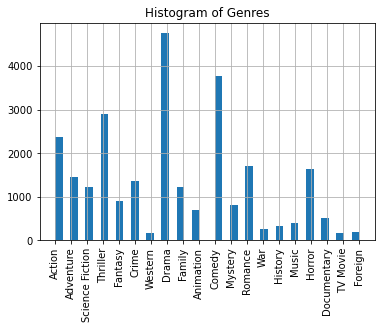

In [21]:
#Plotting a histogram of the genres column, to get a general count of the movie genres
genre_exploded.genres.hist(bins=40)
plt.title("Histogram of Genres")
plt.xticks(rotation=90);

In [22]:
#Assigning the groupby mean with a name to make it easier to navigate in the following analysis
genre_mean=genre_exploded.groupby('genres').mean()

In [23]:
#Finding the mean of popularity of the unique genres
popularity_mean=genre_mean.popularity
popularity_mean


genres
Action             0.929494
Adventure          1.158886
Animation          0.860148
Comedy             0.593915
Crime              0.745221
Documentary        0.183055
Drama              0.592176
Family             0.790948
Fantasy            0.999012
Foreign            0.190910
History            0.579396
Horror             0.465370
Music              0.492814
Mystery            0.690316
Romance            0.593143
Science Fiction    1.007889
TV Movie           0.272252
Thriller           0.742042
War                0.727683
Western            0.594216
Name: popularity, dtype: float64

In [70]:
#Defining a function to create multiple bar plots when called upon
def bargraph(Dataframe, x_label, y_label, title):
    Dataframe.plot(kind='bar')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


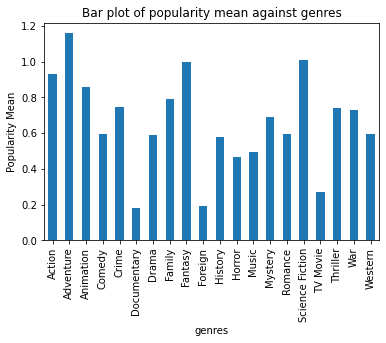

In [71]:
#Bar plot of mean of popularity against genres
bargraph(popularity_mean,'genres','Popularity Mean','Bar plot of popularity mean against genres')

In [46]:
#Finding the mean of the votecount grouped by genre
gen_votecountmean=genre_mean.vote_count
gen_votecountmean

genres
Action             394.592671
Adventure          515.480191
Animation          306.611594
Comedy             176.910100
Crime              278.878139
Documentary         35.390963
Drama              182.810856
Family             274.182488
Fantasy            423.811881
Foreign             16.724324
History            184.795181
Horror             120.127139
Music              125.952736
Mystery            237.279357
Romance            166.417447
Science Fiction    440.236885
TV Movie            34.716049
Thriller           255.679174
War                270.733333
Western            206.890244
Name: vote_count, dtype: float64

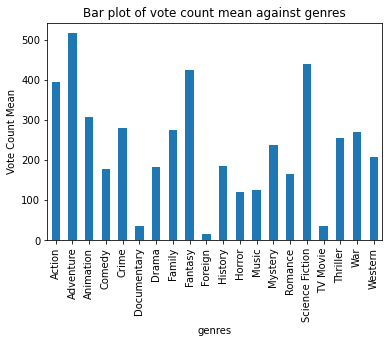

In [47]:
#Bar graph of vote count mean against genres
bargraph(gen_votecountmean,'genres','Vote Count Mean','Bar plot of vote count mean against genres')

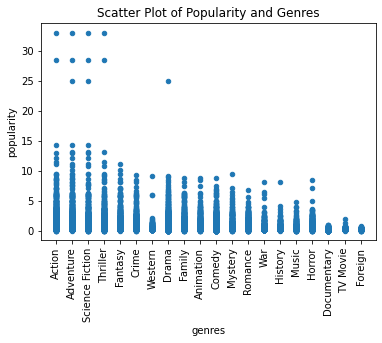

In [24]:
#Scatter plot of mean of popularity against genres
genre_exploded.plot(x="genres", y="popularity", kind="scatter")
plt.xticks(rotation=90)
plt.title("Scatter Plot of Popularity and Genres");

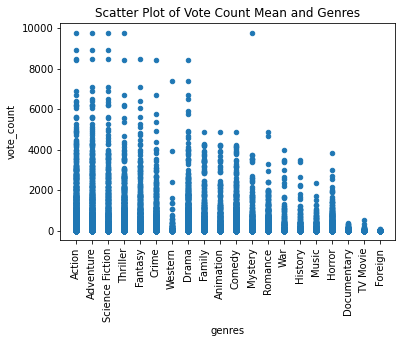

In [25]:
#Plotting a scatter plot of vote count mean and genres
genre_exploded.plot(x="genres", y="vote_count", kind="scatter")
plt.xticks(rotation=90)
plt.title("Scatter Plot of Vote Count Mean and Genres");

The relevant information in columns to measure the most popular genres were, the genre column, the popularity column and the vote count column. The two bar charts, measuring genre against popularity and measuring genre against vote count, show similar trends where the Adventure, Fantasy and Science Fiction were the most popular genres.

### What properties are associated with higher revenue?
Below, I will evaluate the adjusted revenue column, as well as other properties or columns that would be associated with higher revenue from the movies. I will also plot various bar graphs and scatter plots to find the relationship between the properties and adjusted revenue.

In [26]:
#Pulling up the columns of the data set
genre_exploded.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'director', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [27]:
#Naming the adjusted revenue column in the data set to use for further analysis
revenue_adjcol=genre_exploded['revenue_adj']
revenue_adjcol

0        1392445892
0        1392445892
0        1392445892
0        1392445892
1         348161292
            ...    
10863             0
10863             0
10864             0
10864             0
10865             0
Name: revenue_adj, Length: 26850, dtype: int64

In [28]:
#Defining a function to name all movies with absent data for revenue
def unavailable_data(rev):
    if rev == 0:
        result="unavailable_data"
        return result
    

In [29]:
#Applying the defined function
revenue_adjcol.apply(unavailable_data)

0                    None
0                    None
0                    None
0                    None
1                    None
               ...       
10863    unavailable_data
10863    unavailable_data
10864    unavailable_data
10864    unavailable_data
10865    unavailable_data
Name: revenue_adj, Length: 26850, dtype: object

The above function was applied to the data set, to prove the limitation, where later movies could have higher revenue because data regarding revenue is unavailable.

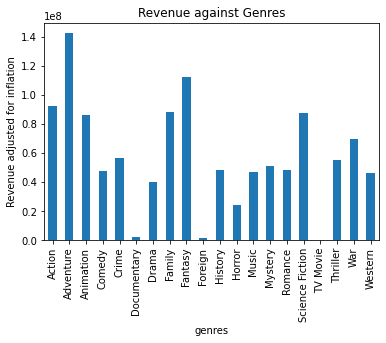

In [73]:
# Bargraph of Revenue against Genres
bargraph(genre_mean.revenue_adj,'genres','Revenue adjusted for inflation','Revenue against Genres')

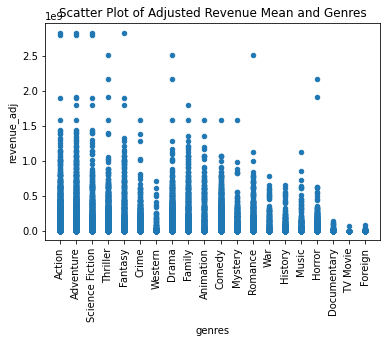

In [31]:
#Plotting a scatter plot of adjusted revenue mean and genres
genre_exploded.plot(x="genres", y="revenue_adj", kind="scatter")
plt.xticks(rotation=90)
plt.title("Scatter Plot of Adjusted Revenue Mean and Genres");

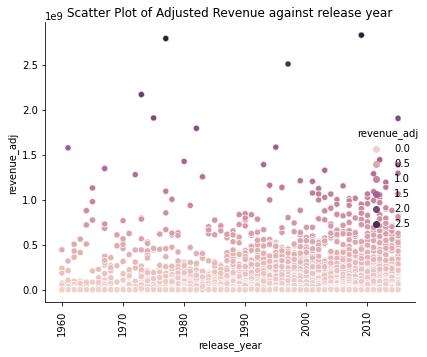

In [32]:
#Scatter Plot of Adjusted Revenue against release year
sns.relplot(x="release_year",y="revenue_adj", data=genre_exploded,hue="revenue_adj")
plt.xticks(rotation=90,fontsize=10)
plt.tight_layout()
plt.title("Scatter Plot of Adjusted Revenue against release year")
plt.show();

There seem to be more revenue generated in later years, as there is a positive relationship between adjusted revenue and the release year.

<a id='conclusions'></a>
## Conclusions
What Genres have been the most popular?
To answer this question, we looked at visualizations of comparison between genres and popularity mean ratings, as well as vote counts on the tmdb website. We found that according to this data the three most popular genres were, Adventure, Fantasy and Science Fiction, in both comparisons.


What properties are associated with high revenue?
The properties associated with higher revenue seem to relate to the genres people find most popular. The years the movies were released were also related as later years seemed to generate more revenue. 


## Limitations
Some records of older movies in the 1960s' revenue seem to be absent from the data. This might lean the data towards a positive correlation in the scatter plot of adjusted revenue against the release year in the second research question.
